1.Import packages

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import random
import datetime
import time
from zfel import sase1d

2.Input parameters

In [3]:
Nruns=1                             # Number of runs
npart   = 1024                      # n-macro-particles per bucket 
s_steps = 800                       # n-sample points along bunch length
z_steps = 100                       # n-sample points along undulator
energy  = 13.64e9                   # electron energy [eV]
eSpread = 1.0e-4                    # relative rms energy spread [ ]
emitN   = 1.2e-6                    # normalized transverse emittance [m-rad]
currentMax = 3400                   # peak current [Ampere]
beta = 26                           # mean beta [meter]
unduPeriod = 0.03                   # undulator period [meter]
unduL = 70                          # length of undulator [meter]
radWavelength = 1.5e-10             # seed wavelength? [meter], used only in single-freuqency runs
dEdz = 0                            # rate of relative energy gain or taper [keV/m], optimal~130
iopt = 5                            # 5=SASE, 4=seeded
P0 = 0.0                            # small seed input power [W]
constseed = 1                       # whether we want to use constant random seed for reproducibility, 1 Yes, 0 No

1D SASE Run with Tapering

In [8]:
unduK = np.ones(z_steps+1)*3.5      # undulator parameter, K [ ]

'''
Put input parameters into a inp_struct dict, for 1D FEL run
'''
inp_struct={'Nruns':Nruns,'npart':npart,'s_steps':s_steps,'z_steps':z_steps,'energy':energy,'eSpread':eSpread,\
            'emitN':emitN,'currentMax':currentMax,'beta':beta,'unduPeriod':unduPeriod,'unduK':unduK,'unduL':\
            unduL,'radWavelength':radWavelength,'dEdz':dEdz,'iopt':iopt,'P0':P0,'constseed':constseed}
'''
Use sase function in sase1d.py to run 1D FEL
'''
z_t,power_z_t,s_t,power_s_t,rho_t,detune_t,field_t,\
field_s_t,gainLength_t,resWavelength_t,\
thet_out_t,gam_out_t,bunching_t,history_t=sase1d.saseTaper(inp_struct)

/Users/lipigupta/zfel/zfel/zfel/sase1d.py:387: RuntimeWarning: divide by zero encountered in log
  plt.plot(z,np.log(power_z))


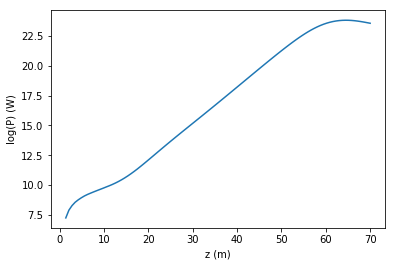

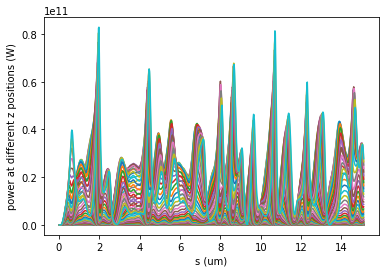

In [9]:
sase1d.plot_log_power_z(history_t)
sase1d.plot_power_s(history_t)

1D SASE run without tapering

In [15]:
unduK = 3.5
'''
Put input parameters into a inp_struct dict, for 1D FEL run
'''
inp_struct={'Nruns':Nruns,'npart':npart,'s_steps':s_steps,'z_steps':z_steps,'energy':energy,'eSpread':eSpread,\
            'emitN':emitN,'currentMax':currentMax,'beta':beta,'unduPeriod':unduPeriod,'unduK':unduK,'unduL':\
            unduL,'radWavelength':radWavelength,'dEdz':dEdz,'iopt':iopt,'P0':P0,'constseed':constseed}
'''
Use sase function in sase1d.py to run 1D FEL
'''
z,power_z,s,power_s,rho,detune,field,\
field_s,gainLength,resWavelength,\
thet_out,gam_out,bunching,history=sase1d.sase(inp_struct)

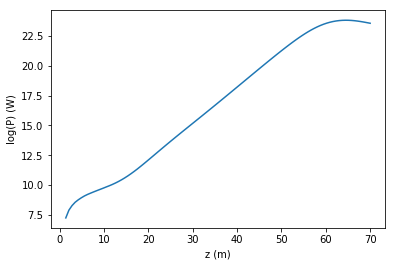

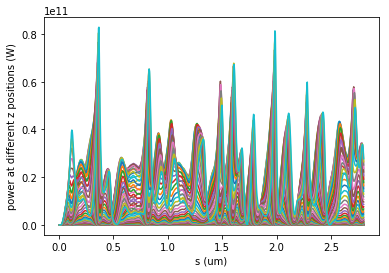

In [16]:
sase1d.plot_log_power_z(history)
sase1d.plot_power_s(history)

In [46]:
list(history)

['z',
 'power_z',
 's',
 'power_s',
 'field',
 'field_s',
 'thet_output',
 'gam',
 'rho',
 'detune',
 'iopt']